## Analyse Customer Feedback and Explore Text Classification & Sentiment Analysis 

In [15]:
import pandas as pd
import numpy as np 

df = pd.read_csv('operations_feedbacks.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3421 entries, 0 to 3420
Data columns (total 27 columns):
StartDate                   3421 non-null object
EndDate                     3421 non-null object
Status                      3421 non-null object
Progress                    3421 non-null object
Duration (in seconds)       3421 non-null object
Finished                    3421 non-null object
RecordedDate                3421 non-null object
ResponseId                  3421 non-null object
DistributionChannel         3421 non-null object
UserLanguage                3421 non-null object
Q_BallotBoxStuffing         161 non-null object
Q4_Browser                  3421 non-null object
Q4_Version                  3421 non-null object
Q4_Operating System         3421 non-null object
Q4_Resolution               3421 non-null object
Q3                          1915 non-null object
Rating                      3011 non-null object
device_model                3421 non-null object
operating_sy

,StartDate,EndDate,Status,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,DistributionChannel,UserLanguage,...,device_model,operating_system_name,operating_system_version,app_version,build_number,Q3 - Sentiment Polarity,Q3 - Sentiment Score,Q3 - Sentiment,Q3 - Topics,Topic
0,Start Date,End Date,Response Type,Progress,Duration (in seconds),Finished,Recorded Date,Response ID,Distribution Channel,User Language,...,device_model,operating_system_name,operating_system_version,app_version,build_number,Q3 - Sentiment Polarity,Q3 - Sentiment Score,Q3 - Sentiment,Q3 - Topics,Topic
1,"{""ImportId"":""startDate"",""timeZone"":""Europe/Ber...","{""ImportId"":""endDate"",""timeZone"":""Europe/Berlin""}","{""ImportId"":""status""}","{""ImportId"":""progress""}","{""ImportId"":""duration""}","{""ImportId"":""finished""}","{""ImportId"":""recordedDate"",""timeZone"":""Europe/...","{""ImportId"":""_recordId""}","{""ImportId"":""distributionChannel""}","{""ImportId"":""userLanguage""}",...,"{""ImportId"":""device_model""}","{""ImportId"":""operating_system_name""}","{""ImportId"":""operating_system_version""}","{""ImportId"":""app_version""}","{""ImportId"":""build_number""}","{""ImportId"":""QID2_TEXT_9d097c598dd842c980e9fcc...","{""ImportId"":""QID2_TEXT_9d097c598dd842c980e9fcc...","{""ImportId"":""QID2_TEXT_9d097c598dd842c980e9fcc...","{""ImportId"":""QID2_TEXT_9d097c598dd842c980e9fcc...","{""ImportId"":""Topic_CEDfxhe5s1""}"
2,2019-06-04 08:44:13,2019-06-04 08:45:32,IP Address,100,79,True,2019-06-04 08:45:32,R_10MWmq3mVJVgggs,anonymous,EN,...,iPhone X,iOS,12.3.1,2.0.1,3313,0,-1,Negative,Unknown,Funktionalität
3,2019-06-05 09:36:31,2019-06-05 09:40:19,IP Address,100,228,True,2019-06-05 09:40:19,R_1Ley5R6gxeEX0dX,anonymous,EN,...,iPhone 8,iOS,12.3.1,2.0.1,3313,1,1,Positive,Unknown,Falsche Einträge
4,2019-06-06 17:08:29,2019-06-06 17:08:42,IP Address,100,12,True,2019-06-06 17:08:42,R_1Lcll5Zp1u4ERAT,anonymous,EN,...,iPhone X,iOS,12.3.1,2.0.1,3313,NaN,NaN,NaN,NaN,NaN


## Cleaning

In [7]:
# drop first two rows
df.drop(df.index[0:2], inplace=True)
df.head(5)

,StartDate,EndDate,Status,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,DistributionChannel,UserLanguage,...,device_model,operating_system_name,operating_system_version,app_version,build_number,Q3 - Sentiment Polarity,Q3 - Sentiment Score,Q3 - Sentiment,Q3 - Topics,Topic
2,2019-06-04 08:44:13,2019-06-04 08:45:32,IP Address,100,79,True,2019-06-04 08:45:32,R_10MWmq3mVJVgggs,anonymous,EN,...,iPhone X,iOS,12.3.1,2.0.1,3313,0,-1,Negative,Unknown,Funktionalität
3,2019-06-05 09:36:31,2019-06-05 09:40:19,IP Address,100,228,True,2019-06-05 09:40:19,R_1Ley5R6gxeEX0dX,anonymous,EN,...,iPhone 8,iOS,12.3.1,2.0.1,3313,1,1,Positive,Unknown,Falsche Einträge
4,2019-06-06 17:08:29,2019-06-06 17:08:42,IP Address,100,12,True,2019-06-06 17:08:42,R_1Lcll5Zp1u4ERAT,anonymous,EN,...,iPhone X,iOS,12.3.1,2.0.1,3313,NaN,NaN,NaN,NaN,NaN
5,2019-06-06 21:45:13,2019-06-06 21:46:13,IP Address,100,59,True,2019-06-06 21:46:13,R_3JeYS9ZJNeUnEbJ,anonymous,EN,...,iPhone 7,iOS,12.3.1,2.0.1,3313,0,-8,Negative,Unknown,Feature
6,2019-06-08 18:55:31,2019-06-08 18:55:39,IP Address,100,8,True,2019-06-08 18:55:40,R_Y6sIzOg03u9FdAJ,anonymous,EN,...,iPhone 6s,iOS,12.3.1,2.0.1,3313,NaN,NaN,NaN,NaN,NaN


In [8]:
df1 = df[['StartDate', 'EndDate', 'operating_system_name', 'app_version', 'Q3', 'Rating']]
df1.head(5)

,StartDate,EndDate,operating_system_name,app_version,Q3,Rating
2,2019-06-04 08:44:13,2019-06-04 08:45:32,iOS,2.0.1,Nur Probleme mit Online Service werde immer na...,1
3,2019-06-05 09:36:31,2019-06-05 09:40:19,iOS,2.0.1,"Sehr geehrte Damen und Herren, bitte aktualis...",5
4,2019-06-06 17:08:29,2019-06-06 17:08:42,iOS,2.0.1,NaN,5
5,2019-06-06 21:45:13,2019-06-06 21:46:13,iOS,2.0.1,İch möchte gerne die Restschuld meiner Kredite...,2
6,2019-06-08 18:55:31,2019-06-08 18:55:39,iOS,2.0.1,NaN,5


In [18]:
# total number of observations in the data set 
print(df1.count())

# count feedbacks with no written text 
print(df1['Q3'].isnull().sum())

# count feedbacks with no star rating
print(df1['Rating'].isnull().sum())

StartDate                3419
EndDate                  3419
operating_system_name    3419
app_version              3419
Q3                       1913
Rating                   3009
dtype: int64
1506
410


In [19]:
# drop rows with missing values in written feedback or Rating 
dfmod = df1.dropna(how='any', subset=['Q3', 'Rating'])
dfmod.shape[0]

1713

In [20]:
# check if any unnoticed missing values are left 
dfmod.groupby('Q3')['Q3'].count().sort_values(ascending=False)

Q3
Sehr gut                                                                                    4
Alles                                                                                       3
Super                                                                                       3
👎🏻👎🏻                                                                                        2
Perfekt                                                                                     2
                                                                                           ..
Meine Verträge einfach sichtbar machen. Im Web sehe ich diese, in der App nicht...          1
Meine Verträge sind nicht sichtbar                                                          1
Meine Verträge werden nicht geladen...                                                      1
Meine Verträge werden nicht in der App angezeigt. So habe ich mir das nicht vorgestellt.    1
                                                         

In [21]:
# inspect data types 
dfmod.dtypes

StartDate                object
EndDate                  object
operating_system_name    object
app_version              object
Q3                       object
Rating                   object
dtype: object

In [22]:
dfmod.head(5)

,StartDate,EndDate,operating_system_name,app_version,Q3,Rating
2,2019-06-04 08:44:13,2019-06-04 08:45:32,iOS,2.0.1,Nur Probleme mit Online Service werde immer na...,1
3,2019-06-05 09:36:31,2019-06-05 09:40:19,iOS,2.0.1,"Sehr geehrte Damen und Herren, bitte aktualis...",5
5,2019-06-06 21:45:13,2019-06-06 21:46:13,iOS,2.0.1,İch möchte gerne die Restschuld meiner Kredite...,2
7,2019-06-09 14:54:07,2019-06-09 14:56:02,iOS,2.0.1,Wenn ich mich auf dem iPhone eilogge kommt imm...,3
15,2019-06-15 18:10:35,2019-06-15 18:11:41,iOS,2.0.1,Es wäre ganz toll wenn man auch sehen könnte w...,3


In [23]:
# Convert StartDate and EndDate to datetime variables 
dfmod['StartDate'] = pd.to_datetime(dfmod['StartDate'], format='%Y-%m-%d %H:%M:%S')
dfmod['EndDate'] = pd.to_datetime(dfmod['EndDate'], format='%Y-%m-%d %H:%M:%S')

# check if modification was successful 
dfmod.dtypes

/Users/mmueckshoff/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/mmueckshoff/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


StartDate                datetime64[ns]
EndDate                  datetime64[ns]
operating_system_name            object
app_version                      object
Q3                               object
Rating                           object
dtype: object

## Preperation & Exploration

In [24]:
# modify Rating
dfmod['Rating'] = dfmod['Rating'].astype(int)
dfmod.dtypes

/Users/mmueckshoff/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


StartDate                datetime64[ns]
EndDate                  datetime64[ns]
operating_system_name            object
app_version                      object
Q3                               object
Rating                            int64
dtype: object

In [25]:
# convert Rating to binary variable with labes 'happy' and 'sad'
dfmod['Rating_binary'] = dfmod['Rating'].apply(lambda x: 1 if x >=4 else 0)
dfmod.head(5)

/Users/mmueckshoff/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,StartDate,EndDate,operating_system_name,app_version,Q3,Rating,Rating_binary
2,2019-06-04 08:44:13,2019-06-04 08:45:32,iOS,2.0.1,Nur Probleme mit Online Service werde immer na...,1,0
3,2019-06-05 09:36:31,2019-06-05 09:40:19,iOS,2.0.1,"Sehr geehrte Damen und Herren, bitte aktualis...",5,1
5,2019-06-06 21:45:13,2019-06-06 21:46:13,iOS,2.0.1,İch möchte gerne die Restschuld meiner Kredite...,2,0
7,2019-06-09 14:54:07,2019-06-09 14:56:02,iOS,2.0.1,Wenn ich mich auf dem iPhone eilogge kommt imm...,3,0
15,2019-06-15 18:10:35,2019-06-15 18:11:41,iOS,2.0.1,Es wäre ganz toll wenn man auch sehen könnte w...,3,0


In [26]:
dfmod.dtypes

StartDate                datetime64[ns]
EndDate                  datetime64[ns]
operating_system_name            object
app_version                      object
Q3                               object
Rating                            int64
Rating_binary                     int64
dtype: object

In [44]:
dfmod['Q3'] = dfmod['Q3'].str.lower()
dfmod.head()

/Users/mmueckshoff/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,StartDate,EndDate,operating_system_name,app_version,Q3,Rating,Rating_binary
2,2019-06-04 08:44:13,2019-06-04 08:45:32,iOS,2.0.1,nur probleme mit online service werde immer na...,1,0
3,2019-06-05 09:36:31,2019-06-05 09:40:19,iOS,2.0.1,"sehr geehrte damen und herren, bitte aktualis...",5,1
5,2019-06-06 21:45:13,2019-06-06 21:46:13,iOS,2.0.1,i̇ch möchte gerne die restschuld meiner kredit...,2,0
7,2019-06-09 14:54:07,2019-06-09 14:56:02,iOS,2.0.1,wenn ich mich auf dem iphone eilogge kommt imm...,3,0
15,2019-06-15 18:10:35,2019-06-15 18:11:41,iOS,2.0.1,es wäre ganz toll wenn man auch sehen könnte w...,3,0


In [46]:
# add a variable indicating the length of the feedback 
dfmod['feedback_length'] = dfmod['Q3'].apply(len)
dfmod.head()

/Users/mmueckshoff/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,StartDate,EndDate,operating_system_name,app_version,Q3,Rating,Rating_binary,feedback_length
2,2019-06-04 08:44:13,2019-06-04 08:45:32,iOS,2.0.1,nur probleme mit online service werde immer na...,1,0,113
3,2019-06-05 09:36:31,2019-06-05 09:40:19,iOS,2.0.1,"sehr geehrte damen und herren, bitte aktualis...",5,1,197
5,2019-06-06 21:45:13,2019-06-06 21:46:13,iOS,2.0.1,i̇ch möchte gerne die restschuld meiner kredit...,2,0,54
7,2019-06-09 14:54:07,2019-06-09 14:56:02,iOS,2.0.1,wenn ich mich auf dem iphone eilogge kommt imm...,3,0,198
15,2019-06-15 18:10:35,2019-06-15 18:11:41,iOS,2.0.1,es wäre ganz toll wenn man auch sehen könnte w...,3,0,85


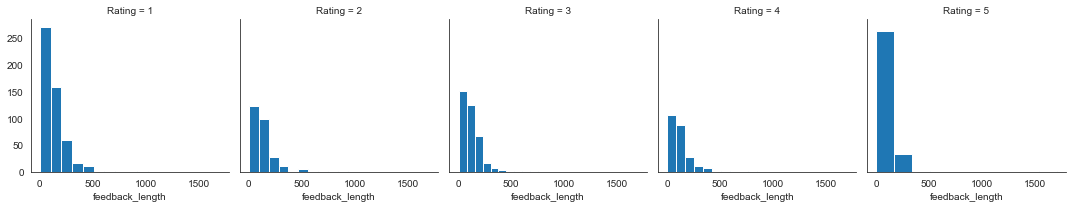

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('white')
%matplotlib inline
g = sns.FacetGrid(dfmod,col='Rating')
g.map(plt.hist,'feedback_length')

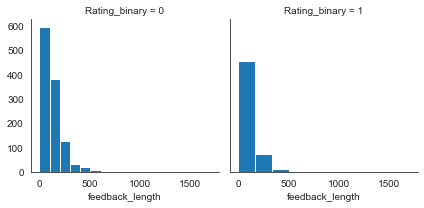

In [51]:
g = sns.FacetGrid(dfmod,col='Rating_binary')
g.map(plt.hist,'feedback_length')

In [85]:
# Print most frequent N-grams in the file (code from: https://gist.github.com/benhoyt/dfafeab26d7c02a52ed17b6229f0cb52)
import collections
import re
import sys
import time

import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud

def tokenize(string):
    """Convert string to lowercase and split into words (ignoring
    punctuation), returning list of words.
    """
    return re.findall(r'\w+', string.lower())


def count_ngrams(lines, min_length=2, max_length=4):
    """Iterate through given lines iterator (file object or list of
    lines) and return n-gram frequencies. The return value is a dict
    mapping the length of the n-gram to a collections.Counter
    object of n-gram tuple and number of times that n-gram occurred.
    Returned dict includes n-grams of length min_length to max_length.
    """
    lengths = range(min_length, max_length + 1)
    ngrams = {length: collections.Counter() for length in lengths}
    queue = collections.deque(maxlen=max_length)

    # Helper function to add n-grams at start of current queue to dict
    def add_queue():
        current = tuple(queue)
        for length in lengths:
            if len(current) >= length:
                ngrams[length][current[:length]] += 1

    # Loop through all lines and words and add n-grams to dict
    for line in lines:
        for word in tokenize(line):
            queue.append(word)
            if len(queue) >= max_length:
                add_queue()

    # Make sure we get the n-grams at the tail end of the queue
    while len(queue) > min_length:
        queue.popleft()
        add_queue()

    return ngrams


def print_most_frequent(ngrams, num=10):
    """Print num most common n-grams of each length in n-grams dict."""
    for n in sorted(ngrams):
        print('----- {} most common {}-grams -----'.format(num, n))
        for gram, count in ngrams[n].most_common(num):
            print('{0}: {1}'.format(' '.join(gram), count))
        print('')

In [86]:
def print_word_cloud(ngrams, num=5):
    """Print word cloud image plot """
    words = []
    for n in sorted(ngrams):
        for gram, count in ngrams[n].most_common(num):
            s = ' '.join(gram)
            words.append(s)
            
    cloud = WordCloud(width=1440, height= 1080,max_words= 200).generate(' '.join(words))
    plt.figure(figsize=(20, 15))
    plt.imshow(cloud)
    plt.axis('off');
    plt.show()
    print('')

In [75]:
happy_feedbacks = dfmod.query('Rating_binary == 1')['Q3']
happy_feedbacks.head()

3     sehr geehrte damen und herren,  bitte aktualis...
17                  kann ich momentan nicht entscheiden
23    die app ist sehr übersichtlich und durchdacht,...
26                                            ist i o  
30                   ooops vorher zu früh abgeschickt 🤓
Name: Q3, dtype: object

In [76]:
unhappy_feedbacks = dfmod.query('Rating_binary == 0')['Q3']
unhappy_feedbacks.head()

2     nur probleme mit online service werde immer na...
5     i̇ch möchte gerne die restschuld meiner kredit...
7     wenn ich mich auf dem iphone eilogge kommt imm...
15    es wäre ganz toll wenn man auch sehen könnte w...
20    anmeldung ist nervig. passworteinschränkungen ...
Name: Q3, dtype: object

In [94]:
# create word clouds with most frequent words in (un)happy reviews
most_frequent_happyreviews = count_ngrams(happy_feedbacks,max_length=3)
most_frequent_unhappyreviews = count_ngrams(unhappy_feedbacks,max_length=3)

In [95]:
print_most_frequent(most_frequent_happyreviews, num= 10)

----- 10 most common 2-grams -----
die app: 63
der app: 48
in der: 44
kann ich: 24
sehr gut: 23
es wäre: 21
app ist: 20
wenn man: 20
z b: 18
für die: 15

----- 10 most common 3-grams -----
in der app: 27
die app ist: 13
es wäre schön: 12
wäre schön wenn: 12
über die app: 9
ich die app: 8
wie kann ich: 8
schön wenn man: 7
mit der app: 7
mit freundlichen grüßen: 6



In [96]:
print_most_frequent(most_frequent_unhappyreviews, num= 10)

----- 10 most common 2-grams -----
die app: 215
der app: 144
in der: 128
nicht mehr: 71
app ist: 63
kann ich: 60
über die: 50
wenn man: 48
ist die: 39
funktioniert nicht: 36

----- 10 most common 3-grams -----
in der app: 89
die app ist: 45
über die app: 29
ist die app: 27
mit freundlichen grüßen: 18
die app nicht: 16
zu den verträgen: 15
es wäre schön: 14
wäre schön wenn: 13
der app nicht: 12



In [91]:
# Generate a word cloud image
wordcloud = WordCloud().generate(most_frequent_happyreviews)

plt.imshow(wordcloud, interpolation="bilinear")
plt.show()

TypeError: expected string or bytes-like object

## Modelling

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(dfmod['Q3'], 
                                                    dfmod['Rating_binary'], 
                                                    random_state=1)

print('Number of rows in the total set: {}'.format(dfmod.shape[0]))
print('Number of rows in the training set: {}'.format(X_train.shape[0]))
print('Number of rows in the test set: {}'.format(X_test.shape[0]))

Number of rows in the total set: 1713
Number of rows in the training set: 1284
Number of rows in the test set: 429


In [30]:
from sklearn.feature_extraction.text import CountVectorizer

# Instantiate the CountVectorizer method
count_vector = CountVectorizer()

# Fit the training data and then return the matrix
training_data = count_vector.fit_transform(X_train)

# Transform testing data and return the matrix. Note we are not fitting the testing data into the CountVectorizer()
testing_data = count_vector.transform(X_test)

In [31]:
from sklearn.naive_bayes import MultinomialNB
naive_bayes = MultinomialNB()
naive_bayes.fit(training_data, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [32]:
predictions = naive_bayes.predict(testing_data)

In [33]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('Accuracy score: ', format(accuracy_score(y_test, predictions)))
print('Precision score: ', format(precision_score(y_test, predictions)))
print('Recall score: ', format(recall_score(y_test, predictions)))
print('F1 score: ', format(f1_score(y_test, predictions)))

Accuracy score:  0.7249417249417249
Precision score:  0.8392857142857143
Recall score:  0.30128205128205127
F1 score:  0.44339622641509435


In [34]:
# building a model with text data and mobile phone & app version information